# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [32]:
# initial imports
import os
import statistics as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import hvplot.pandas
import holoviews as hv
import plotly.express as px
import plotly.graph_objs as go
from pathlib import Path

%matplotlib inline

In [33]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_KEY")



## Load Data

In [34]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)

sfo_data = sfo_data.reset_index(level=None, drop=True, col_level=0,col_fill='')
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [35]:
#Analysis for top ten
#top_ten_ppsf = sfo_data_index_year['sale_price_sqr_foot'].nlargest(10).groupby('neigborhood').mean()
#top_ten_gr = sfo_data_index_year['gross_rent'].nlargest(10).groupby('neigborhood').mean()
#top_ten_hu = sfo_data_index_year['housing_units'].nlargest(10).groupby('neigborhood').mean()
#top_ten_data = pd.concat([sfo_data['year'],sfo_data['neighborhood'],top_ten_ppsf,top_ten_gr,top_ten_hu],axis="columns",join="outer")
#top_ten_gr

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

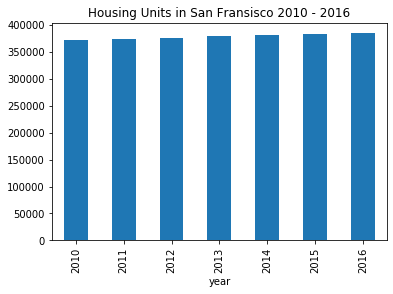

In [36]:
# Use the Pandas plot function to plot a bar chart the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
mean_housing_units = sfo_data['housing_units'].groupby(sfo_data['year']).mean()

mean_housing_units.plot(kind="bar",title="Housing Units in San Fransisco 2010 - 2016",rot=90)


In [37]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


mean_housing_units.hvplot.bar(x='year',
                                   y='housing_units',
                                   title='Housing Units in San Fransisco 2010 - 2016',
                                   ylim=(350_000, 400_000),
                                   xlabel='Year',
                                   ylabel='Housing Units').opts(yformatter="%.0f")

:Bars   [year]   (housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [38]:
# Calculate the average gross rent and average sale price per square foot
average_gross_rent = sfo_data['gross_rent'].groupby(sfo_data['year']).mean()
average_sale_pric_sqft = sfo_data['sale_price_sqr_foot'].groupby(sfo_data['year']).mean()

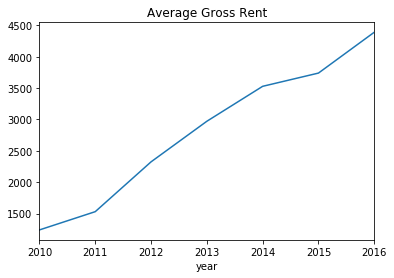

In [39]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_gross_rent.plot(kind="line",title="Average Gross Rent")

### Average Sales Price per Year

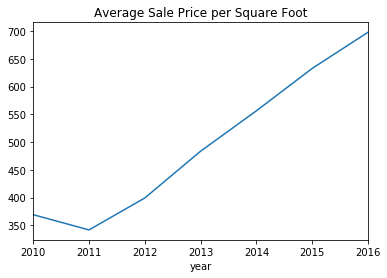

In [40]:
# Plot the Average Sales Price per Year as a line chart
average_sale_pric_sqft.plot(kind="line",title="Average Sale Price per Square Foot")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [41]:
# Group by year and neighborhood and then create a new dataframe of the mean values

avg_values_indexed = sfo_data.groupby(by="neighborhood").mean().sort_values(by="sale_price_sqr_foot", ascending=False).drop(columns=['year'])
avg_values = sfo_data.groupby(by="year").mean().sort_values(by="sale_price_sqr_foot",ascending=False)
avg_values_indexed

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
...,...,...,...
Visitacion Valley,301.466180,381321.50,3657.000000
Outer Mission,242.370952,379374.50,2995.750000
Bayview,204.588623,376454.00,2318.400000


In [42]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
##NEED HELP GETTING THE YEAR TO BE THE X AXIS
sfo_data.hvplot.line("year","sale_price_sqr_foot",xlabel="Year", ylabel="Avg. Sale Price per Sq Ft",groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [43]:
# Getting the data from the top 10 expensive neighborhoods
expensive_neighborhood =  avg_values_indexed.groupby("neighborhood").mean().sort_values("sale_price_sqr_foot",ascending=False)
expensive_neighborhood_sorted = expensive_neighborhood['sale_price_sqr_foot'].nlargest(10)

expensive_neighborhood_top_ten = expensive_neighborhood.head(10)
expensive_neighborhood_sorted

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

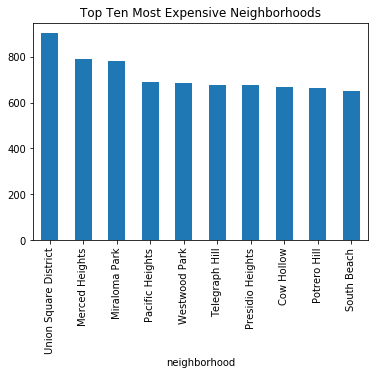

In [44]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_neighborhood_sorted.plot(x="year",
                                   y="sale_price_sqr_foot",
                                   title="Top Ten Most Expensive Neighborhoods",
                                   kind="bar")


In [45]:
top_ten_avg_values = avg_values_indexed['sale_price_sqr_foot'].nlargest(10)
top_ten_avg_values

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [46]:
# Parallel Coordinates Plot
px.parallel_coordinates(expensive_neighborhood_top_ten.reset_index(), color="sale_price_sqr_foot")

##NO YEARS Top ten only#HOW DO YOU DO IT SO WE CAN GET only top ten and include sale price, housing units and gross rent

In [47]:
# Parallel Categories Plot
px.parallel_categories(
    expensive_neighborhood_top_ten.reset_index(),
    dimensions=['neighborhood','sale_price_sqr_foot','housing_units', 'gross_rent'],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_per_sqr_foot": "Price / SqFt",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"}
        )

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [48]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [49]:
# Calculate the mean values for each neighborhood

mean_value_neighborhoods = sfo_data.sort_values(by="neighborhood", ascending=True)
mean_value_neighborhoods

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
233,2014,Alamo Square,484.443552,380348,3528
118,2012,Alamo Square,183.099317,376454,2324
293,2015,Alamo Square,602.115877,382295,3739
59,2011,Alamo Square,272.527310,374507,1530
...,...,...,...,...,...
117,2011,Yerba Buena,438.860545,374507,1530
175,2012,Yerba Buena,491.814003,376454,2324
232,2013,Yerba Buena,753.011413,378401,2971
58,2010,Yerba Buena,333.126774,372560,1239


In [50]:
# Join the average values with the neighborhood locations
joined = pd.DataFrame()
joined_df = pd.concat([df_neighborhood_locations,mean_value_neighborhoods],axis="columns",join="inner")
joined_df.head()

,Neighborhood,Lat,Lon,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2010,Alamo Square,291.182945,372560,1239
1,Anza Vista,37.779598,-122.443451,2010,Anza Vista,267.932583,372560,1239
2,Bayview,37.734670,-122.401060,2010,Bayview,170.098665,372560,1239
3,Bayview Heights,37.728740,-122.410980,2010,Buena Vista Park,347.394919,372560,1239
4,Bernal Heights,37.728630,-122.443050,2010,Central Richmond,319.027623,372560,1239


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [51]:
# Create a scatter mapbox to analyze neighborhood info
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(joined_df, lat="Lat", lon="Lon", color="gross_rent", size="sale_price_sqr_foot",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, hover_name = "Neighborhood", title = "Average Sale Price Per SQFT and Gross Rent in San Fran")
map.show()

In [341]:
map = px.scatter_mapbox(joined_df, lat="Lat", lon="Lon", color="gross_rent", size="sale_price_sqr_foot",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, hover_name = "Neighborhood", title="Avg Sale Price per Sq Ft and Gross Rent in San Fran")
map.show()